In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.integrate import odeint

import math

# Kuramoto model
$$ \dot \varphi_i = \omega_i + \frac K N \sum_{j=1}^N{a_{ij}}\sin(\varphi_j - \varphi_i)$$

In [11]:
#define all needed variables
N = 10
# phi = np.zeros(N)
omega = np.random.uniform(low=-1, high=1, size=(N**2))
# omega = omega**3 - 0.3*omega
K = 10*8

def make_A(N=10):
    #make an adjaceny matrix for an NxN systems where neighbors are connected. 
    #periodic boundary conditions
    
    #this is super messy, maybe make clearer. 
    
    
    A = np.zeros((N**2,N**2))
    #handle corners
    #top left
    A[0,1] = 1
    A[0,N-1] = 1
    A[0,N] = 1
    A[0, N**2 - N] = 1
    #bottom left
    A[N-1,0] = 1
    A[N-1,N-2] = 1
    A[N-1,N**2 - 1] = 1
    A[N-1, 2*N-1] = 1
#     top right
    A[ N**2 - N,  N**2 - N+1] = 1
    A[ N**2 - N, N**2 - 1] = 1
    A[ N**2 - N, 0] = 1
    A[ N**2 - N,  N**2 - 2*N] = 1
    #bottom right
    A[ N**2 - 1,  N**2 - N] = 1
    A[ N**2 - 1, N**2 - 2] = 1
    A[ N**2 - 1, N**2 - N-1] = 1
    A[ N**2 - 1,  N-1] = 1
    
    #first column
    for i in range(1, N-1):
        A[i, i + N] = 1
        A[i, N**2 - N + i] = 1
        A[i, i + 1] = 1
        A[i, i - 1] = 1
    #first column
    for i in range(1, N-1):
        A[N**2 - N + i, N**2 - N + i+1] = 1
        A[N**2 - N + i, N**2 - N + i-1] = 1
        A[N**2 - N + i, N**2 - 2*N + i] = 1
        A[N**2 - N + i, i] =1
    #first row
    for i in range(1, N-1):
        A[i*N, (i-1)*N] = 1
        A[i*N, (i+1)*N] = 1
        A[i*N, i*N + 1] = 1
        A[i*N, (i+1)*N - 1] = 1
    #last row
    for i in range(2, N):
        A[i*N-1, i*N-2] = 1
        A[i*N-1, i*N-N] = 1
        A[i*N-1, (i-1)*N-1] = 1
        A[i*N-1, (i+1)*N-1] = 1
    #middles
    for i in range(N+1, N**2-N-1):
        if(i%N != N-1) and (i%N != 0):
            A[i, i+1] = 1
            A[i, i-1] = 1
            A[i, i-N] = 1
            A[i, i+N] = 1
    return A

# A = np.ones((N,N)) - np.eye(N) #this is all to all right now, but want to make it so you can set the number of connections
A = make_A(N)
# print(np.sum(A)/((N**2-1)**2))
# plt.figure()
# plt.imshow(A)
dt = 0.01 #timestep size, if this is too large, weird things seem to be happening
T_max = 40. #maximum time to run simulation for
t = np.arange(0, T_max, dt)
# print(t.shape)

In [12]:
def phi_dot(phi, t, omega, K, A):
    #this is for the Kuramoto oscillator
    N = len(phi)
    dphi_dt = np.zeros(np.shape(phi))
    for i in range(N):
        dphi_dt[i] = (omega[i] + K/N *np.sum(A[i]@np.sin(phi - phi[i])))
    return dphi_dt

# def run_and_graph(omega, K=10, T_max =20, dt = 0.01, p = 1, N = 100):
#     plt.figure()
#     A = make_A(N, p = p)
#     sol = odeint(phi_dot, np.random.uniform(0,1,size = (N)), np.arange(0, T_max, dt), args=(omega, K, A))
#     for i in range(min(10, N)):
#         plt.plot(np.arange(0, T_max, dt), sol[:,i])
#     plt.plot(np.linspace(0,T_max), np.linspace(0,T_max)*np.mean(omega) + np.mean(sol[0,:]), 'black', linewidth = 2)
#     plt.xlabel("time")
#     plt.ylabel("solution value ")
#     plt.title("first 10 phases with p = "+ str(p))
#     plt.show()

In [13]:
#do the integration part
start = np.random.uniform(0,1,size = (N**2))
sol1 = odeint(phi_dot, start, t, args=(omega, K, A))
sol2 = odeint(phi_dot, start, t, args=(omega, K*2, A))
sol4 = odeint(phi_dot, start, t, args=(omega, K*4, A))
sol8 = odeint(phi_dot, start, t, args=(omega, K*8, A))
sol16 = odeint(phi_dot, start, t, args=(omega, K*16, A))

<IPython.core.display.Javascript object>


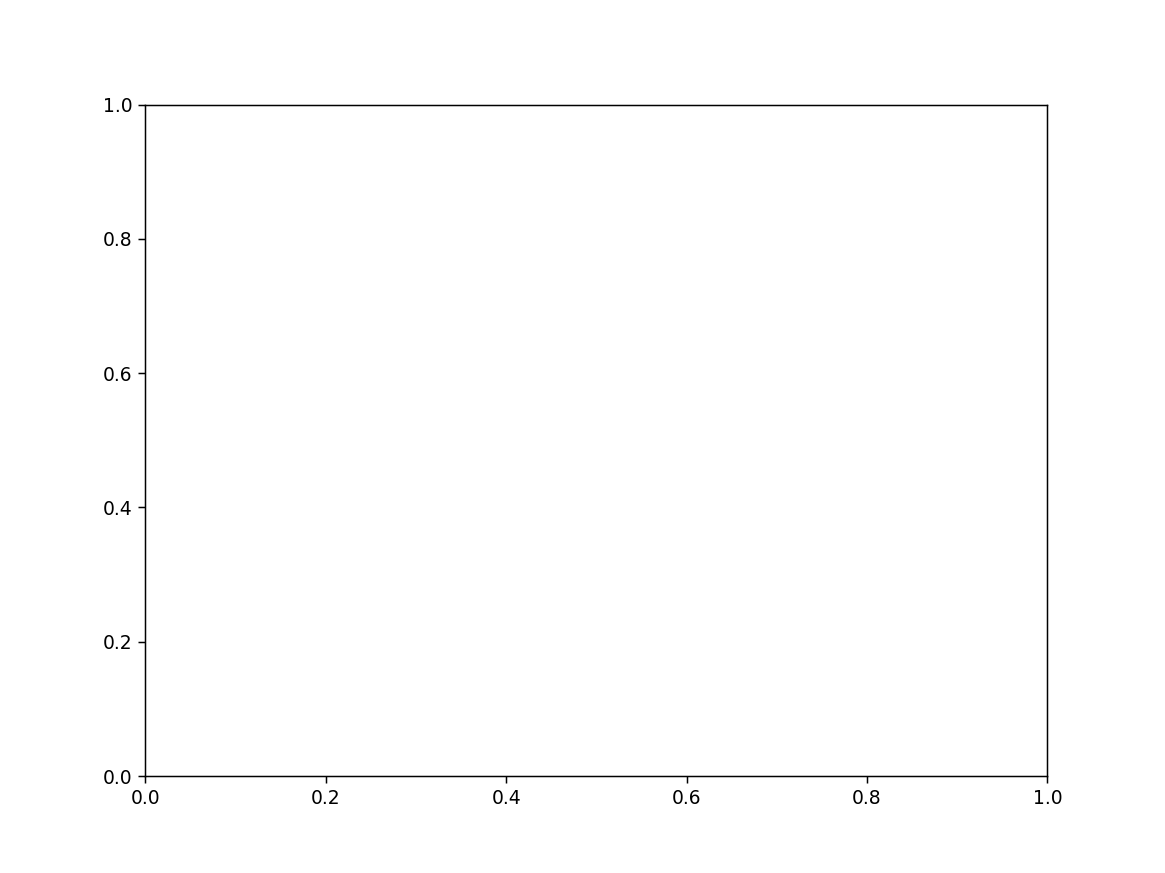

<IPython.core.display.Javascript object>

4000
done


In [16]:
%matplotlib notebook
#got this example from http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
#animating the solution over time
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes()

vmin = -1
vmax = 1
speed = 4

# x = np.sin(sol[0,:].reshape(N, -1).T)
# im = plt.imshow(x, interpolation='none', vmin=vmin, vmax=vmax)

fig, axs = plt.subplots(2, 2)
# for ax, interp in zip(axs, ['nearest', 'bilinear', 'bicubic']):
x = np.sin(sol1[0,:].reshape(N, -1).T)
im1 = axs[0, 0].imshow(x, interpolation='none', vmin=vmin, vmax=vmax)

x = np.sin(sol2[0,:].reshape(N, -1).T)
im2 = axs[0, 1].imshow(x, interpolation='none', vmin=vmin, vmax=vmax)

x = np.sin(sol4[0,:].reshape(N, -1).T)
im4 = axs[1, 0].imshow(x, interpolation='none', vmin=vmin, vmax=vmax)

x = np.sin(sol8[0,:].reshape(N, -1).T)
im8 = axs[1,1].imshow(x, interpolation='none', vmin=vmin, vmax=vmax)

# plt.clim(vmin=vmin, vmax=vmax)
# plt.colorbar()
fig.colorbar(im1, ax=axs[0,0])

# plt.title("0")
axs[0,0].set_title("K = "+str(K))
axs[0,1].set_title("K = "+str(2*K))
axs[1,0].set_title("K = "+str(4*K))
axs[1, 1].set_title("K = "+str(8*K))
title = axs[0,0].text(0.5,0.85, "", bbox={'facecolor':'w', 'alpha':0.5, 'pad':5},
                transform=ax.transAxes, ha="center")

# # # initialization function: plot the background of each frame
# def init():
#     fig = plt.figure()

#     x = np.sin(sol[0,:].reshape(N, -1).T)
#     im = plt.imshow(x, interpolation='none', vmin=vmin, vmax=vmax)
#     plt.clim(vmin=vmin, vmax = vmax)
#     plt.colorbar()
#     im.set_array(sol[0,:].reshape(N, -1).T)
#     return im

t_list = np.arange(0, T_max, dt)
# # animation function.  This is called sequentially
def animate(i):
    
    x = np.sin(sol1[i*speed,:].reshape(N, -1).T)
    im1.set_data(x)

    x = np.sin(sol2[i*speed,:].reshape(N, -1).T)
    im2.set_data(x)

    x = np.sin(sol4[i*speed,:].reshape(N, -1).T)
    im4.set_data(x)

    x = np.sin(sol8[i*speed,:].reshape(N, -1).T)
    im8.set_data(x)


#     x = np.sin(sol[i*2,:].reshape(N, -1).T)
#     im.set_data(x)
    title.set_text('t = {0:.{1}f}'.format(t_list[i*speed], 2))
    return im1, im2, im4, im8, title

(n_time, n_i) = sol1.shape

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, save_count=int(n_time/speed))#,init_func = init
#                                frames=200, interval=20, blit=True)

# save the animation 

print(n_time)

writergif = animation.PillowWriter(fps=30)
anim.save("Kuramoto_2d_4_values_T_"+str(int(T_max))+"_k_"+str(K)+'.gif', writer=writergif)#, fps=30)


fig.show()

print("done")

0.7121355560319669
0.0273900186066188


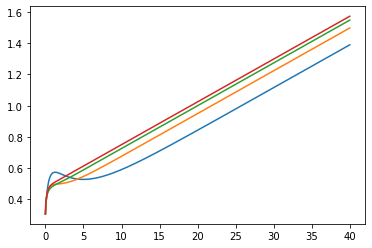

In [18]:
%matplotlib inline
i = 25
plt.plot(t, sol1[:,i])
plt.plot(t, sol2[:,i])
plt.plot(t, sol4[:,i])
plt.plot(t, sol8[:,i])
print(omega[i])
print(np.mean(omega))

# plt.plot(t, omega[i]*t + sol1[0,i], 'black')
# plt.plot(t, np.mean(omega)*t + sol1[0,i], 'black')
plt.show()

0.7121355560319669
0.0273900186066188


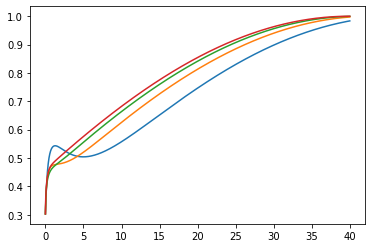

In [19]:
%matplotlib inline
i = 25
plt.plot(t, np.sin(sol1[:,i]))
plt.plot(t, np.sin(sol2[:,i]))
plt.plot(t, np.sin(sol4[:,i]))
plt.plot(t, np.sin(sol8[:,i]))
print(omega[i])
print(np.mean(omega))

# plt.plot(t, omega[i]*t + sol1[0,i], 'black')
# plt.plot(t, np.mean(omega)*t + sol1[0,i], 'black')
plt.show()

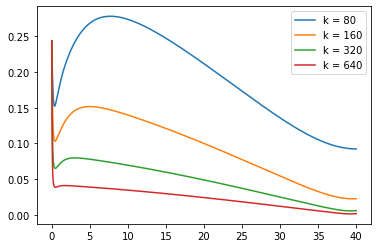

In [20]:
#looking at how the std changes with time for the different levels of sychonization
#I was thinking that as the oscialltors get schronized, the std would decrease. 
std = np.std(np.sin(sol1), axis = 1)
plt.plot(t, std, label = "k = "+str(K))
plt.plot(t, np.std(np.sin(sol2), axis = 1), label = "k = "+str(2*K))
plt.plot(t, np.std(np.sin(sol4), axis = 1), label = "k = "+str(4*K))
plt.plot(t, np.std(np.sin(sol8), axis = 1) ,label = "k = "+str(8*K))
plt.legend()


Not converged :(
Not converged :(
Not converged :(
converged!!
2357
converged!!
976
converged!!
429
converged!!
190


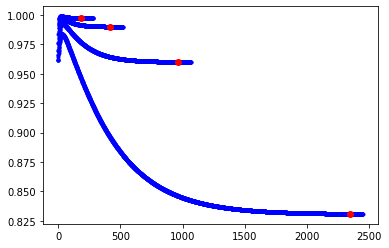

In [10]:
#level of synchronisation is the r thing given in equation 2.2 of that paper. 

def find_r(x, i):
    #calculates r based on equation 2.2
    return abs(np.sum(math.e**(x[i,:]*1j)))/len(x[0])

def find_sync_time(x, epsilon = 1e-6):

    last = 0
    count = 0
    for i in range(len(x)):
        r = find_r(x, i)
        if(np.abs(r - last) < epsilon):
            count += 1
            if(count >= 10):
                print("converged!!")
                print(i)
                return (i - count)
        else:
            count = 0
        last = r
    print("Not converged :(")
    return 0
# def graph_sync_time(x)
# for i in range(r+10):#         plt.plot(i, x, '.r')
# #     plt.plot(i, abs(np.sum(math.e**(sol8[i,:]*1j)))/len(sol1[0]), '.b')

start = np.random.uniform(0,1,size = (N**2))
sync_time_list = []
k_list = [1, 2, 4, 8, 16, 32, 64]
for i in k_list:
    sol = odeint(phi_dot, start, t, args=(omega, K*i, A))
    sync_time = find_sync_time(sol)
    
    sync_time_list.append(sync_time)
    
#     plt.plot(K*i, t[sync_time], '.')

    if(sync_time > 0):
        for i in range(sync_time + 100):
            plt.plot(i, abs(np.sum(math.e**(sol[i,:]*1j)))/len(sol[0]), '.b')
        plt.plot(sync_time, abs(np.sum(math.e**(sol[sync_time,:]*1j)))/len(sol[0]), 'or')
    


# r = find_converge_time(sol8)
# print(r)
# print(find_converge_time(sol16))

# for i in range(r+10):#         plt.plot(i, x, '.r')
#     plt.plot(i, abs(np.sum(math.e**(sol8[i,:]*1j)))/len(sol1[0]), '.b')
#     plt.plot(i, abs(np.sum(math.e**(sol16[i,:]*1j)))/len(sol1[0]), '.', color = "green")
# #     plt.plot(i, abs(np.sum(math.e**(sol1[i*10,:]*1j)))/len(sol1[0]), '.', color = "yellow")
    

# plt.ylabel("r")    
plt.show()

[0, 0, 0, 2332, 954, 406, 165]


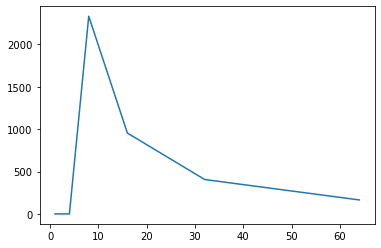

In [8]:
print(converge_time_list)
plt.plot([1, 2, 4, 8, 16, 32, 64], converge_time_list)